In [1]:
import pandas as pd
import pickle
import datetime
import numpy as np
from matplotlib.pyplot import hist
from matplotlib import pyplot

countriesOfInterest = ["HK", "JP", 'ZA', 'TN', 'TR', 'GB', 'MX', 'US', 'CO',
                       'EC', 'AU', 'NZ']
countriesOfInterest = ["ZA", "EG", "TW", "JP", "DK", "FI", "US", "CA", "AU", "NZ", "BR", "CO"]


In [2]:
stats = pd.DataFrame()
comb_data= pd.DataFrame()
for country in countriesOfInterest:
    data = pickle.load(open( "Raw Track Data\\" + country + "_train.p", "rb" ))
    data = data.append(
        pickle.load(open( "Raw Track Data\\" + country + "_val.p", "rb" )))
    data = data.append(
        pickle.load(open( "Raw Track Data\\" + country + "_test.p", "rb" )))
    stats.loc[country,"n_tracks"] = data.track_id.nunique()
    stats.loc[country,"n_playlists"] = data.Playlist.nunique()
    stats.loc[country,"mean_n_segments"] = data.groupby("track_id").size().mean()
    duration = data.groupby("track_id").duration.sum()
    stats.loc[country,"mean_duration"] = str(datetime.timedelta(seconds=duration.mean()))
    comb_data = comb_data.append(data)

stats.loc["aggregate","n_tracks"] = comb_data.track_id.nunique()
stats.loc["aggregate","n_playlists"] = comb_data.Playlist.nunique()
stats.loc["aggregate","mean_n_segments"] = comb_data.groupby("track_id").size().mean()
duration = comb_data.groupby("track_id").duration.sum()
stats.loc["aggregate","mean_duration"] = str(datetime.timedelta(seconds=duration.mean()))

In [3]:
stats
# Number of tracks
# Number of playlists
# Mean number of segments over tracks
# Mean duration over tracks
# Within each country and across all

,n_tracks,n_playlists,mean_n_segments,mean_duration
ZA,2192.0,69.0,1043.009124,0:04:26.854877
EG,810.0,27.0,888.991358,0:03:55.153939
TW,2808.0,65.0,794.329416,0:03:57.401490
JP,1859.0,41.0,831.656267,0:03:57.755744
DK,3532.0,82.0,814.484711,0:03:36.507981
FI,2624.0,58.0,803.325457,0:03:39.158394
US,2416.0,69.0,812.242964,0:03:46.832476
CA,1577.0,31.0,756.230818,0:03:29.189874
AU,994.0,31.0,751.960765,0:03:32.821756
NZ,677.0,42.0,816.867061,0:03:39.736208


In [4]:
comb_data.columns

Index(['start', 'duration', 'confidence', 'loudness_start',
       'loudness_max_time', 'loudness_max', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6',
       'p7', 'p8', 'p9', 'p10', 'p11', 'p12', 't1', 't2', 't3', 't4', 't5',
       't6', 't7', 't8', 't9', 't10', 't11', 't12', 'track_id', 'Country',
       'Year', 'Playlist', 'change'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028B123ACE88>]],
      dtype=object)

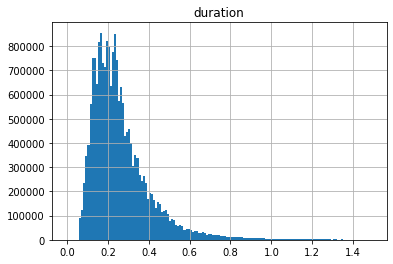

In [15]:
comb_data.hist(column = "duration", bins = np.arange(0, 1.5, 0.01))

AttributeError: 'numpy.ndarray' object has no attribute 'savefig'

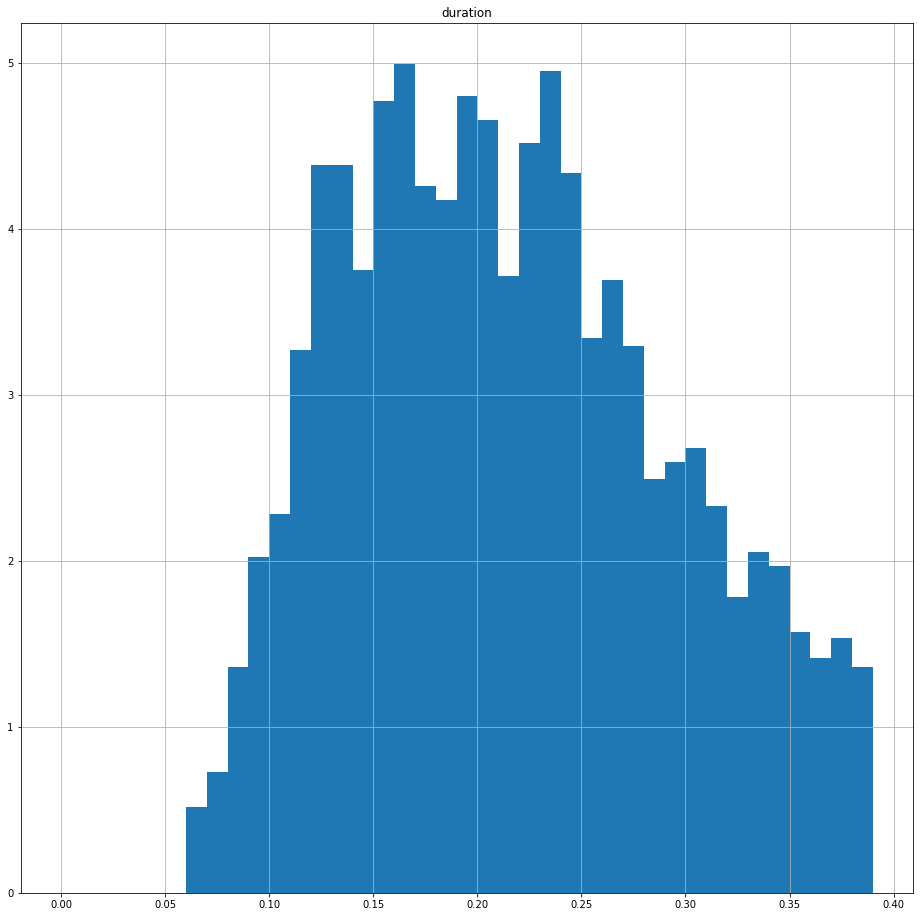

In [22]:
plt = comb_data.hist(column = "duration", bins = np.arange(0, 0.4, 0.01),
                    figsize = (16,16), density = True)


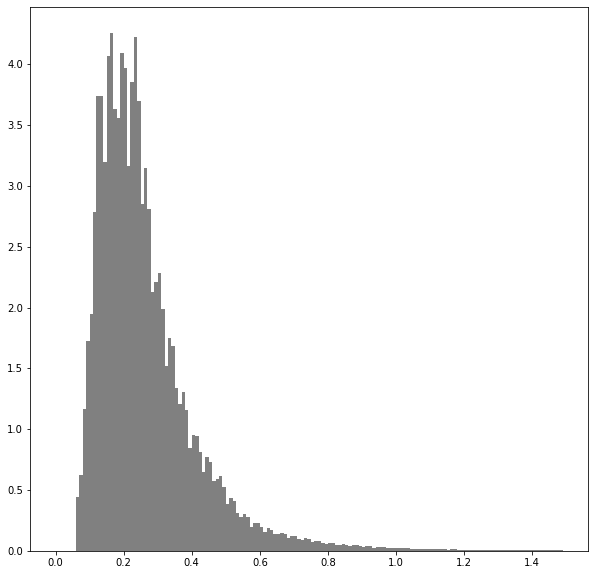

In [25]:
dur_array = comb_data.duration.values
pyplot.figure(figsize = (10,10))
hist(dur_array, density=True, color='grey', bins = np.arange(0, 1.5, 0.01))
pyplot.savefig('duration_hist.JPEG', format='JPEG')

In [28]:
(dur_array > 1).mean()

0.007227878793772987

In [17]:
qwe

,start,duration,confidence,loudness_start,loudness_max_time,loudness_max,p1,p2,p3,p4,...,t8,t9,t10,t11,t12,track_id,Country,Year,Playlist,change
0,0.00000,0.23519,1.000,-60.000,0.05514,-18.965,0.371,0.233,0.268,0.030,...,-0.570,-16.943,104.535,-1.579,-1.120,spotify:track:5u91yhBCFvQZIbGE1WcpOv,ZA,2013,37i9dQZF1DWWxuZGEYY4h1,NaN
1,0.23519,0.19578,0.839,-26.162,0.05685,-14.071,0.658,0.696,0.743,0.582,...,5.385,16.475,-25.425,-53.694,0.512,spotify:track:5u91yhBCFvQZIbGE1WcpOv,ZA,2013,37i9dQZF1DWWxuZGEYY4h1,NaN
2,0.43098,0.14939,0.660,-26.702,0.01846,-20.000,0.043,0.063,0.418,0.076,...,6.604,22.104,-23.651,-13.663,3.256,spotify:track:5u91yhBCFvQZIbGE1WcpOv,ZA,2013,37i9dQZF1DWWxuZGEYY4h1,NaN
